<a href="https://colab.research.google.com/github/anderson-perez/IAC-2025-2/blob/main/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
X = np.linspace(-10, 10, 100)

In [ ]:
X

In [5]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [6]:
y = sigmoid(X)

In [ ]:
y

In [8]:
import matplotlib.pyplot as plt

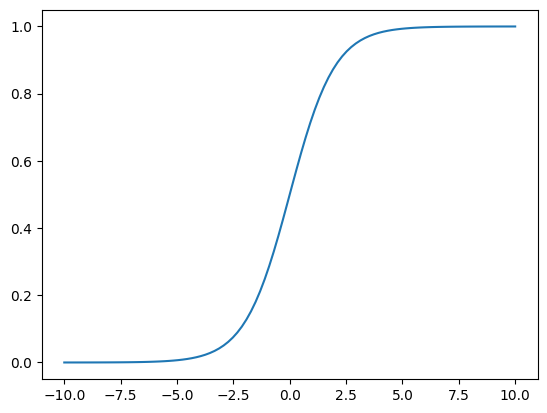

In [9]:
plt.plot(X, y)

In [11]:
from scipy.special import expit

In [12]:
import pandas as pd

In [13]:
dados = pd.read_csv('/content/diabetes.csv')

In [14]:
dados.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dados.describe()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = dados.iloc[:, 0:8].values
y = dados.iloc[:, 8].values

In [18]:
X.shape, y.shape

((768, 8), (768,))

In [24]:
# Dividir os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=69, train_size=.8)

In [25]:
X_treino.shape, X_teste.shape

((614, 8), (154, 8))

In [26]:
y_treino.shape, y_teste.shape

((614,), (154,))

# Regressão Logística

In [27]:
from sklearn.linear_model import LogisticRegression

In [36]:
preditor = LogisticRegression(solver='liblinear')

In [37]:
preditor.fit(X_treino, y_treino)

LogisticRegression(solver='liblinear')

In [38]:
preditor.coef_

array([[ 0.09277758,  0.02633258, -0.01703654,  0.00163355, -0.00061561,
         0.05295337,  0.47478311,  0.01107194]])

In [39]:
preditor.intercept_

array([-5.34113751])

In [40]:
preditor.predict([X_teste[0]])

array([0])

In [41]:
y_teste[0]

np.int64(0)

In [34]:
preditor.predict_log_proba([X_teste[0]])

array([[-0.11769437, -2.19793418]])

In [35]:
preditor.predict_proba([X_teste[0]])

array([[0.88896771, 0.11103229]])

In [43]:
X_teste[0]

array([ 2.   , 88.   , 58.   , 26.   , 16.   , 28.4  ,  0.766, 22.   ])

In [44]:
y_teste[0]

np.int64(0)

In [42]:
preditor.score(X_teste, y_teste)

0.7922077922077922

In [45]:
preditor.classes_

array([0, 1])